In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import os,sys
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

import time
from IPython.display import clear_output as clear

# 1 FOC随时间变化

## 1.1 month_foc热力图

In [3]:
#设置工作路径
os.chdir("F:/Data/flash_drought/MONTH_FOC")
os.getcwd()

'F:\\Data\\flash_drought\\MONTH_FOC'

In [4]:
#获取文件名
list_names = os.listdir()[:]
list_names 

['site_50136.pickle',
 'site_50353.pickle',
 'site_50425.pickle',
 'site_50434.pickle',
 'site_50468.pickle',
 'site_50514.pickle',
 'site_50527.pickle',
 'site_50548.pickle',
 'site_50557.pickle',
 'site_50564.pickle',
 'site_50603.pickle',
 'site_50618.pickle',
 'site_50639.pickle',
 'site_50656.pickle',
 'site_50658.pickle',
 'site_50727.pickle',
 'site_50739.pickle',
 'site_50742.pickle',
 'site_50745.pickle',
 'site_50756.pickle',
 'site_50758.pickle',
 'site_50774.pickle',
 'site_50788.pickle',
 'site_50834.pickle',
 'site_50844.pickle',
 'site_50853.pickle',
 'site_50854.pickle',
 'site_50862.pickle',
 'site_50873.pickle',
 'site_50877.pickle',
 'site_50888.pickle',
 'site_50915.pickle',
 'site_50936.pickle',
 'site_50945.pickle',
 'site_50948.pickle',
 'site_50949.pickle',
 'site_50953.pickle',
 'site_50963.pickle',
 'site_50968.pickle',
 'site_50973.pickle',
 'site_50978.pickle',
 'site_50983.pickle',
 'site_51053.pickle',
 'site_51060.pickle',
 'site_51068.pickle',
 'site_510

In [ ]:
# 填充月foc值随年份变化
month_foc = pd.DataFrame(np.zeros(71 * 9).reshape((71,9)),index = list(range(1948,2019)),columns = [str(i) + "月" for i in range(3,12)])
for site_name in list_names:
    month_foc_tem = pd.read_pickle(site_name)
    month_foc = month_foc + month_foc_tem
month_foc

In [5]:
# 单站点
# month_foc = pd.read_pickle("site_50136.pickle")

In [ ]:
# 绘制热力图
plt.figure(figsize=(10,4), dpi= 120)
sns.heatmap(month_foc.T, xticklabels=month_foc.index, yticklabels=month_foc.columns, cmap='RdBu_r', center=0,)
plt.title('Month FOC', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('F:/Data/flash_drought/Month FOC.png',dpi = 600)
plt.show()

## 1.2 season_foc热力图

In [15]:
#设置工作路径
os.chdir("F:/Data/flash_drought/SEASON_FOC")

#获取文件名
list_names = os.listdir()[:]

# 填充季节foc值随年份变化
season_foc = pd.DataFrame(np.zeros(71 * 3).reshape((71,3)),index = list(range(1948,2019)),columns = ["春季","夏季","秋季"])
for site_name in list_names:
    season_foc_tem = pd.read_pickle(site_name)
    season_foc = season_foc + season_foc_tem
season_foc

In [8]:
# 单站点
#设置工作路径
# os.chdir("F:/Data/flash_drought/SEASON_FOC")
# season_foc = pd.read_pickle("site_50136.pickle")

In [ ]:
# 绘制热力图
plt.figure(figsize=(10,3), dpi= 120)
sns.heatmap(season_foc.T, xticklabels=season_foc.index, yticklabels=season_foc.columns, cmap='RdBu_r', center=0,)
plt.title('Season FOC', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('F:/Data/flash_drought/Season FOC.png',dpi = 600)
plt.show()

## 1.3 level_foc热力图

In [ ]:
#设置工作路径
os.chdir("F:/Data/flash_drought/LEVEL_FOC")

#获取文件名
list_names = os.listdir()[:]

# 填充季节foc值随年份变化
level_foc = pd.DataFrame(np.zeros(71 * 5).reshape((71,5)),index = list(range(1948,2019)),columns = ["level_" + str(i) for i in range(1,6)])
for site_name in list_names:
    level_foc_tem = pd.read_pickle(site_name)
    level_foc = level_foc + level_foc_tem
level_foc

In [14]:
# 单站点
#设置工作路径
# os.chdir("F:/Data/flash_drought/LEVEL_FOC")
# level_foc = pd.read_pickle("site_50136.pickle")

In [ ]:
# 绘制热力图
plt.figure(figsize=(10,4), dpi= 120)
sns.heatmap(level_foc.T, xticklabels=level_foc.index, yticklabels=level_foc.columns, cmap='RdBu_r', center=0,)
plt.title('Level FOC', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('F:/Data/flash_drought/Level FOC.png',dpi = 600)
plt.show()

# 2 聚类

## 2.1 聚类函数

In [96]:
# data为输入的foc数据，c为迭代次数
def CLUSTER(data,c):
    
    # 原始最高评分为0
    highest_score = 0
    # 计数器m最初次数为0
    m = 0
    
    for i in range(c):
        
        scores = []                                # 用来盛放每次迭代的分数
        labels = np.array([0] * len(data))    # 用来盛放每次迭代的分类结果
        
        # 每次最大簇数为19，循环10000000
        for k in range(2,20):
            label = KMeans(n_clusters = k,max_iter = 10000000).fit(data).labels_
            labels = np.vstack((labels,label))

            score = metrics.silhouette_score(data,label)
            scores.append(score)
            
        # 本次迭代最高得分
        max_score = np.max(scores)
            
        if max_score > highest_score:
            highest_score = max_score.copy()
            data["cluster"] = labels[np.argmax(scores) + 1,:]
            
        m = m + 1
        print(m)
        print(highest_score)
        
    # 附上最大的轮廊系数
    data["silhouette_score"] = highest_score
    
    return(data)

## 2.2 将站点按照月、季节、等级FOC聚类

### 2.2.1 各站点的月、季节、等级FOC所有年系列

In [79]:
# 设置工作路径
os.chdir("F:/Data/flash_drought/MONTH_FOC")

#获取文件名
list_names = os.listdir()[:]

#各站点月频次所有年系列
month_cluster = pd.DataFrame()
for site_name in list_names:
    month_cluster_tem = pd.read_pickle(site_name)
    month_cluster_tem = pd.DataFrame(month_cluster_tem.sum(),columns = [site_name[:-7]])
    month_cluster = pd.concat([month_cluster,month_cluster_tem],axis = 1)
month_cluster.T

,3月,4月,5月,6月,7月,8月,9月,10月,11月
site_50136,0.0,2.0,4.0,2.0,3.0,3.0,0.0,0.0,0.0
site_50353,0.0,3.0,5.0,1.0,2.0,5.0,2.0,1.0,0.0
site_50425,0.0,0.0,2.0,6.0,4.0,3.0,0.0,0.0,0.0
site_50434,0.0,1.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0
site_50468,1.0,1.0,3.0,4.0,3.0,1.0,3.0,0.0,0.0
site_50514,0.0,1.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
site_50527,0.0,0.0,3.0,3.0,2.0,4.0,0.0,0.0,0.0
site_50548,0.0,0.0,2.0,3.0,4.0,3.0,0.0,0.0,0.0
site_50557,0.0,0.0,1.0,2.0,6.0,2.0,1.0,0.0,0.0
site_50564,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0


In [80]:
# 设置工作路径
os.chdir("F:/Data/flash_drought/SEASON_FOC")

#获取文件名
list_names = os.listdir()[:]

#各站点季节频次所有年系列
season_cluster = pd.DataFrame()
for site_name in list_names:
    season_cluster_tem = pd.read_pickle(site_name)
    season_cluster_tem = pd.DataFrame(season_cluster_tem.sum(),columns = [site_name[:-7]])
    season_cluster = pd.concat([season_cluster,season_cluster_tem],axis = 1)
season_cluster.T

,夏季,秋季,冬季
site_50136,8.0,6.0,0.0
site_50353,9.0,9.0,1.0
site_50425,8.0,7.0,0.0
site_50434,7.0,3.0,0.0
site_50468,9.0,7.0,0.0
site_50514,5.0,9.0,0.0
site_50527,6.0,6.0,0.0
site_50548,5.0,7.0,0.0
site_50557,3.0,9.0,0.0
site_50564,8.0,2.0,0.0


In [82]:
# 设置工作路径
os.chdir("F:/Data/flash_drought/LEVEL_FOC")

#获取文件名
list_names = os.listdir()[:]

#各站点等级频次所有年系列
level_cluster = pd.DataFrame()
for site_name in list_names:
    level_cluster_tem = pd.read_pickle(site_name)
    level_cluster_tem = pd.DataFrame(level_cluster_tem.sum(),columns = [site_name[:-7]])
    level_cluster = pd.concat([level_cluster,level_cluster_tem],axis = 1)
level_cluster.T

,level_1,level_2,level_3,level_4,level_5
site_50136,0.0,4.0,5.0,4.0,1.0
site_50353,0.0,5.0,10.0,4.0,0.0
site_50425,0.0,6.0,3.0,2.0,4.0
site_50434,1.0,2.0,3.0,3.0,1.0
site_50468,0.0,7.0,4.0,2.0,3.0
site_50514,0.0,3.0,1.0,5.0,5.0
site_50527,0.0,5.0,4.0,1.0,2.0
site_50548,0.0,4.0,4.0,3.0,1.0
site_50557,0.0,5.0,5.0,1.0,1.0
site_50564,0.0,1.0,5.0,3.0,1.0


### 2.2.2 聚类

In [83]:
# 按每月foc将站点聚类
month_foc_cluster = CLUSTER(month_cluster.T,10000)
month_foc_cluster.to_pickle("F:/Data/flash_drought/MONTH_CLUSTER/month_foc_cluster.pickle")
clear()

# 按每季节foc将站点聚类
season_foc_cluster = CLUSTER(season_cluster.T,10000)
season_foc_cluster.to_pickle("F:/Data/flash_drought/SEASON_CLUSTER/season_foc_cluster.pickle")
clear()

# 按等级foc将站点聚类
level_foc_cluster = CLUSTER(level_cluster.T,10000)
level_foc_cluster.to_pickle("F:/Data/flash_drought/LEVEL_CLUSTER/level_foc_cluster.pickle")
clear()

# 3 可视化

In [ ]:
a = CLUSTER(month_cluster.T,10)
b = CLUSTER(season_cluster.T,10)
b.rename(columns={"夏季":"春季","秋季":"夏季","冬季":"秋季"},inplace = True)
c = CLUSTER(level_cluster.T,10)

In [ ]:
# 聚类结果
c.groupby("cluster").mean().reset_index()
#print(level_foc.sort_values("cluster"))

## 3.1 两两属性可视化

F:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


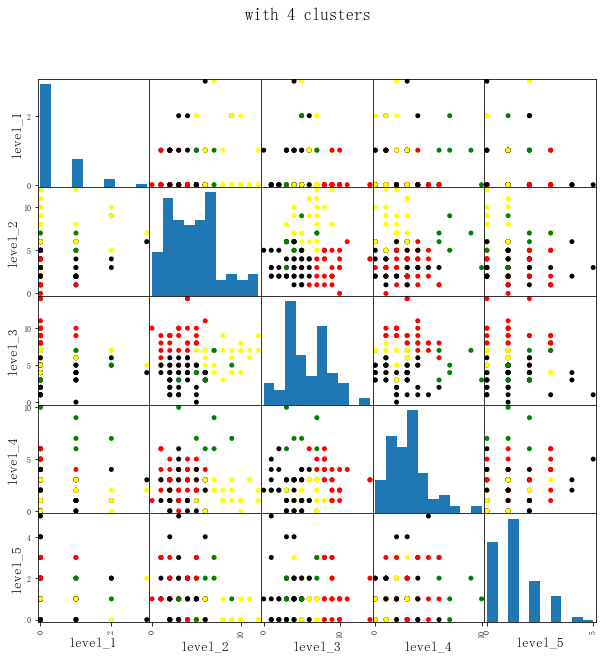

In [117]:
# 字号
plt.rcParams["font.size"] = 14

# 颜色
colors = np.array(["black","red","yellow","green","cyan","blue","purple"])

# 绘图
scatter_matrix(c.iloc[:,:5],s = 100, alpha = 1, c = colors[c["cluster"]],figsize = (10,10))

# 标题
plt.suptitle("with " + str(np.max(c["cluster"]) + 1) + " clusters")

plt.savefig("F:/Data/flash_drought/cluster.png",dpi = 600)

## 3.2 三个属性可视化

In [ ]:
x = level_foc.iloc[:,0]
y = level_foc.iloc[:,1]
z = level_foc.iloc[:,2]
 
ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
 
ax.scatter(x, y, z, c=colors[level_foc["cluster"]],s=50)  # 绘制数据点,颜色是红色
 
ax.set_zlabel('level_3')  # 坐标轴
ax.set_ylabel('level_2')
ax.set_xlabel('level_1')
 
plt.draw()
#plt.pause(100)
#plt.savefig('3D.jpg')
#plt.close()